# TUTORIAL OF TENSORFLOW API 03 ==> CIFAR10


---



# WORK WITH CONVOLUTION NEURAL NETWORK

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

## 1_Download and Load dataset

In [3]:
cifar10 = keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


## 2_Explore dataset

In [4]:
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


## 3_Normalize dataset

In [5]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [6]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

## 4_Plot to visualize some examples dataset

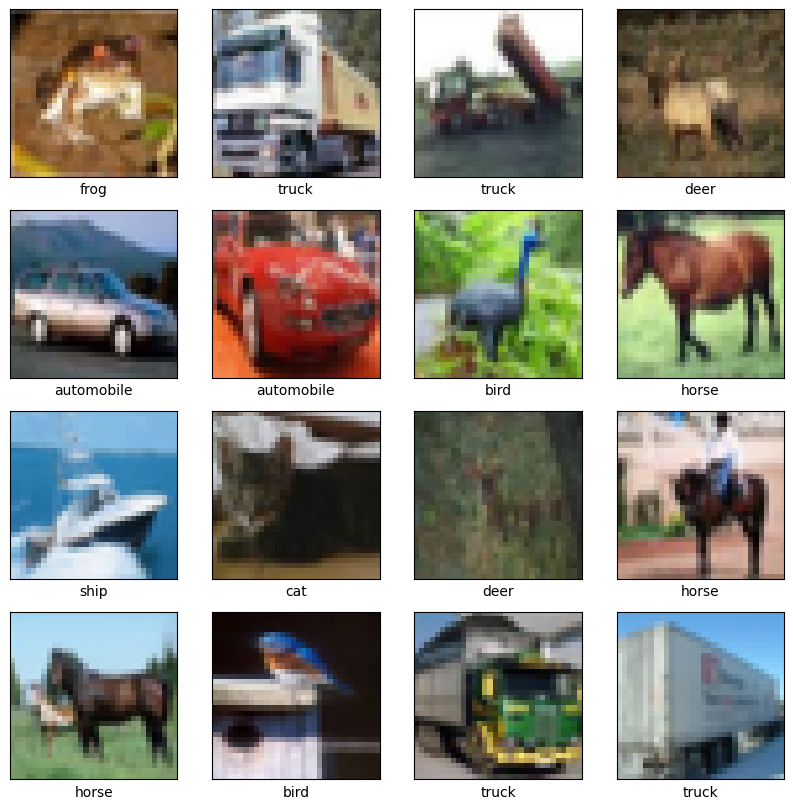

In [7]:
def plot_examples():
  plt.figure(figsize=(10,10))
  for i in range(16):
    plt.subplot(4,4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])

plot_examples()

## 5_Build Model

In [8]:
# Convolution Layers to extract features
model = Sequential()
model.add(Input(shape=(32,32,3)))
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=1, padding='valid', activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=1, padding='valid', activation='relu'))
model.add(MaxPooling2D((2,2)))
# Fully Connected Layers to do specific task
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=10))

In [9]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 64)                7

## 6_Select Hyperparameters for Model

In [10]:
loss = SparseCategoricalCrossentropy(from_logits=True)
optimizer = Adam(learning_rate=0.001)
metrics = ["accuracy"]

model.compile(loss=loss, metrics=metrics, optimizer=optimizer)

batch_size = 64
epochs = 10

In [11]:
history = model.fit(
    train_images,
    train_labels,
    batch_size=batch_size,
    epochs=epochs,
    shuffle=True,
    verbose=1,
    validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 39s 61ms/step - loss: 1.6461 - accuracy: 0.4015 - val_loss: 1.4257 - val_accuracy: 0.4949
Epoch 2/10
625/625 [==============================] - 43s 68ms/step - loss: 1.3238 - accuracy: 0.5266 - val_loss: 1.3188 - val_accuracy: 0.5320
Epoch 3/10
625/625 [==============================] - 35s 55ms/step - loss: 1.2033 - accuracy: 0.5759 - val_loss: 1.1955 - val_accuracy: 0.5850
Epoch 4/10
625/625 [==============================] - 35s 56ms/step - loss: 1.1204 - accuracy: 0.6057 - val_loss: 1.1404 - val_accuracy: 0.6037
Epoch 5/10
625/625 [==============================] - 36s 58ms/step - loss: 1.0608 - accuracy: 0.6276 - val_loss: 1.0837 - val_accuracy: 0.6248
Epoch 6/10
625/625 [==============================] - 41s 65ms/step - loss: 1.0180 - accuracy: 0.6434 - val_loss: 1.0783 - val_accuracy: 0.6260
Epoch 7/10
625/625 [==============================] - 35s 56ms/step - loss: 0.9749 - accuracy: 0.6580 - val_loss: 1.0538 - val_accuracy:

In [12]:
model.save('model_trained.h5')
model = keras.models.load_model('model_trained.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## 7_Evaluation Model

In [13]:
model.evaluate(test_images, test_labels, batch_size=batch_size, verbose=2)

157/157 - 3s - loss: 1.0383 - accuracy: 0.6428 - 3s/epoch - 16ms/step


[1.038258671760559, 0.642799973487854]

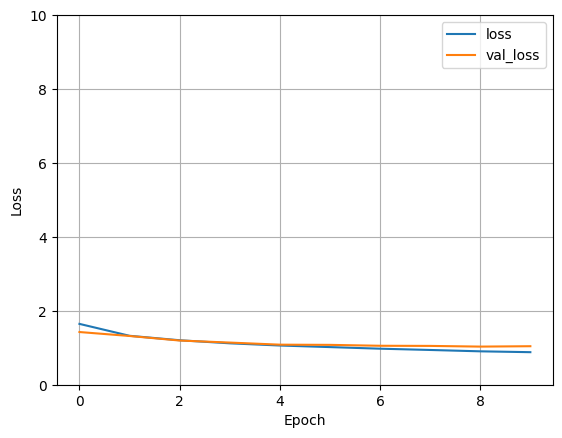

In [14]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)

plot_loss(history)

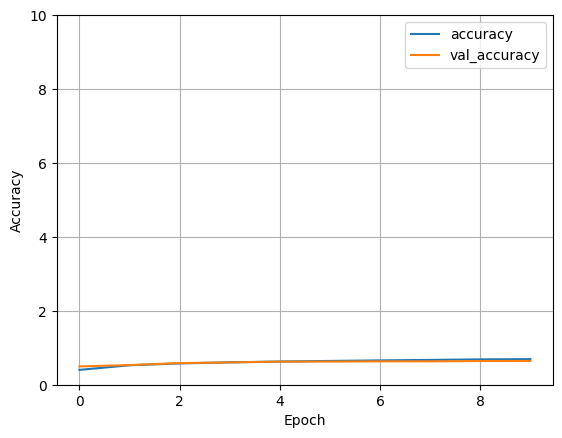

In [15]:
def plot_accuracy(history):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)

plot_accuracy(history)